# Results

In [2]:
import os

import pandas as pd

import numpy as np

from sklearn import preprocessing

from scipy import stats
import scipy.stats as sc
from scipy.cluster.hierarchy import linkage,leaves_list

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataFolderName = '../data_luc/video/'

listVideoName =   ['x264-1908-bridgefar-wasm/x264-results1.csv', 
                   'x264-1908-ice-wasm/x264-results1.csv',
                   'x264-1908-flower-wasm/x264-results1.csv', 
                   'x264-1908-caire-wasm/x264-results1.csv',
                   'x264-0208-sintel-calda-wasm/x264-results1.csv', 
                   'x264-1908-footballcif-wasm/x264-results1.csv',
                   'x264-0308-crowd_run-wasm/x264-results1.csv', 
                   'x264-0608-blue-wasm/x264-results1.csv',
                   'x264-0608-people-wasm/x264-results1.csv', 
                   'x264-1908-sunflowers-wasm/x264-results1.csv',
                   'x264-0408-deadline-wasm/x264-results1.csv', 
                   'x264-2108-bridgeclose-wasm/x264-results1.csv',
                   'x264-1908-husky-wasm/x264-results1.csv', 
                   'x264-1908-tennis-wasm/x264-results1.csv',
                   'x264-1908-riverbed-wasm/x264-results1.csv', 
                   'x264-0608-park-wasm/x264-results1.csv',
                   'x264-0508-soccer-wasm/x264-results1.csv']

# creation of the list of videos (for each video: x264 configurations + measurements)
listVideo = []

for vn in listVideoName:
    listVideo.append(pd.read_csv(open(dataFolderName+vn,"r")))
    
nbVideos = len(listVideo)

# test
print("There are " + str(len(listVideo)) + " videos")
assert (len(listVideoName) == len(listVideo))


#print a csv
listVideo[7]#.drop(['no_8x8dct', 'no_deblock', 'no_mixed_refs', 'no_weightb', 'size', 'usertime', 'systemtime', 'H264', 'no_asm', 'configurationID'], axis=1)[:10]

There are 17 videos


,configurationID,H264,no_8x8dct,no_asm,no_cabac,no_deblock,no_fast_pskip,no_mbtree,no_mixed_refs,no_weightb,rc_lookahead,ref,size,usertime,systemtime,elapsedtime
0,1,True,True,False,False,True,True,False,True,True,20,9,6299221,69.3135,0.4315,5.074625
1,10,True,True,False,True,False,True,False,False,True,40,9,7399075,76.8820,0.5155,5.902625
2,100,True,True,False,False,True,False,True,True,False,40,1,5671506,41.0400,0.3015,2.908125
3,1000,True,True,False,True,False,True,True,True,False,40,9,6297307,72.2645,0.4005,5.027500
4,1001,True,False,False,False,True,False,False,True,False,60,5,7009192,51.5025,0.4640,4.329125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,995,True,True,False,True,True,False,True,True,True,20,1,6480173,40.5265,0.3240,2.882375
1148,996,True,True,False,True,False,True,True,True,False,40,1,6342543,40.2710,0.3245,2.873000
1149,997,True,False,False,False,False,False,True,True,False,40,1,5830971,43.4975,0.3370,3.071500
1150,998,True,True,False,True,False,True,True,True,False,40,5,6285983,51.6095,0.3425,3.631500


In [33]:
res_no_transfer = pd.read_csv("../data_luc/expe/res_no_transfer_nb_conf_training.csv")
res_no_transfer = res_no_transfer.set_index('id_video')
nbConfig = np.array(res_no_transfer.columns, dtype=int)
res_no_transfer

,16,32,64,128,256,320,448,640,960
id_video,,,,,,,,,
0,0.391292,0.248790,0.250447,0.201492,0.132396,0.125109,0.076036,0.055120,0.047153
1,0.246675,0.293818,0.208814,0.174148,0.128332,0.120847,0.107095,0.065487,0.050567
2,0.251790,0.192066,0.177355,0.156871,0.118780,0.113967,0.099459,0.065292,0.057363
3,0.295005,0.249239,0.241503,0.169206,0.114349,0.098715,0.084832,0.066192,0.058016
4,0.319152,0.210811,0.193617,0.134936,0.113298,0.094871,0.065464,0.047339,0.030364
5,0.331426,0.216872,0.205160,0.201961,0.109527,0.089662,0.075019,0.056449,0.037167
6,0.443005,0.271253,0.205749,0.125633,0.076646,0.058904,0.046549,0.035712,0.023775
7,0.220646,0.248876,0.225697,0.126147,0.062381,0.051952,0.043220,0.040424,0.025949
8,0.286713,0.224845,0.167309,0.116852,0.076604,0.070066,0.066445,0.045069,0.039616


In [34]:
res_model_shift = pd.read_csv("../data_luc/expe/res_model_shift_nb_conf_training.csv")
res_model_shift = res_model_shift.set_index('id_video')
res_model_shift

,16,32,64,128,256,320,448,640,960
id_video,,,,,,,,,
0,0.164742,0.103808,0.091867,0.093092,0.110743,0.113365,0.112688,0.115374,0.116946
1,0.094017,0.071347,0.054987,0.069972,0.076319,0.075635,0.081441,0.077607,0.076335
2,0.168759,0.143338,0.106348,0.115942,0.127902,0.126186,0.136439,0.124284,0.110174
3,0.069577,0.075137,0.088887,0.089768,0.109903,0.105136,0.104891,0.106385,0.098982
4,0.047532,0.044724,0.045653,0.049829,0.056363,0.055444,0.059760,0.058845,0.056857
5,0.077984,0.063139,0.053670,0.065810,0.075493,0.072901,0.080606,0.078417,0.072608
6,0.059392,0.055755,0.057941,0.063051,0.073736,0.073806,0.077638,0.077018,0.072452
7,0.049157,0.043165,0.041667,0.053128,0.066563,0.066780,0.074948,0.072910,0.068294
8,0.050130,0.063591,0.052422,0.061119,0.072570,0.072558,0.078708,0.077977,0.072778


# When and how to use transfer learning?

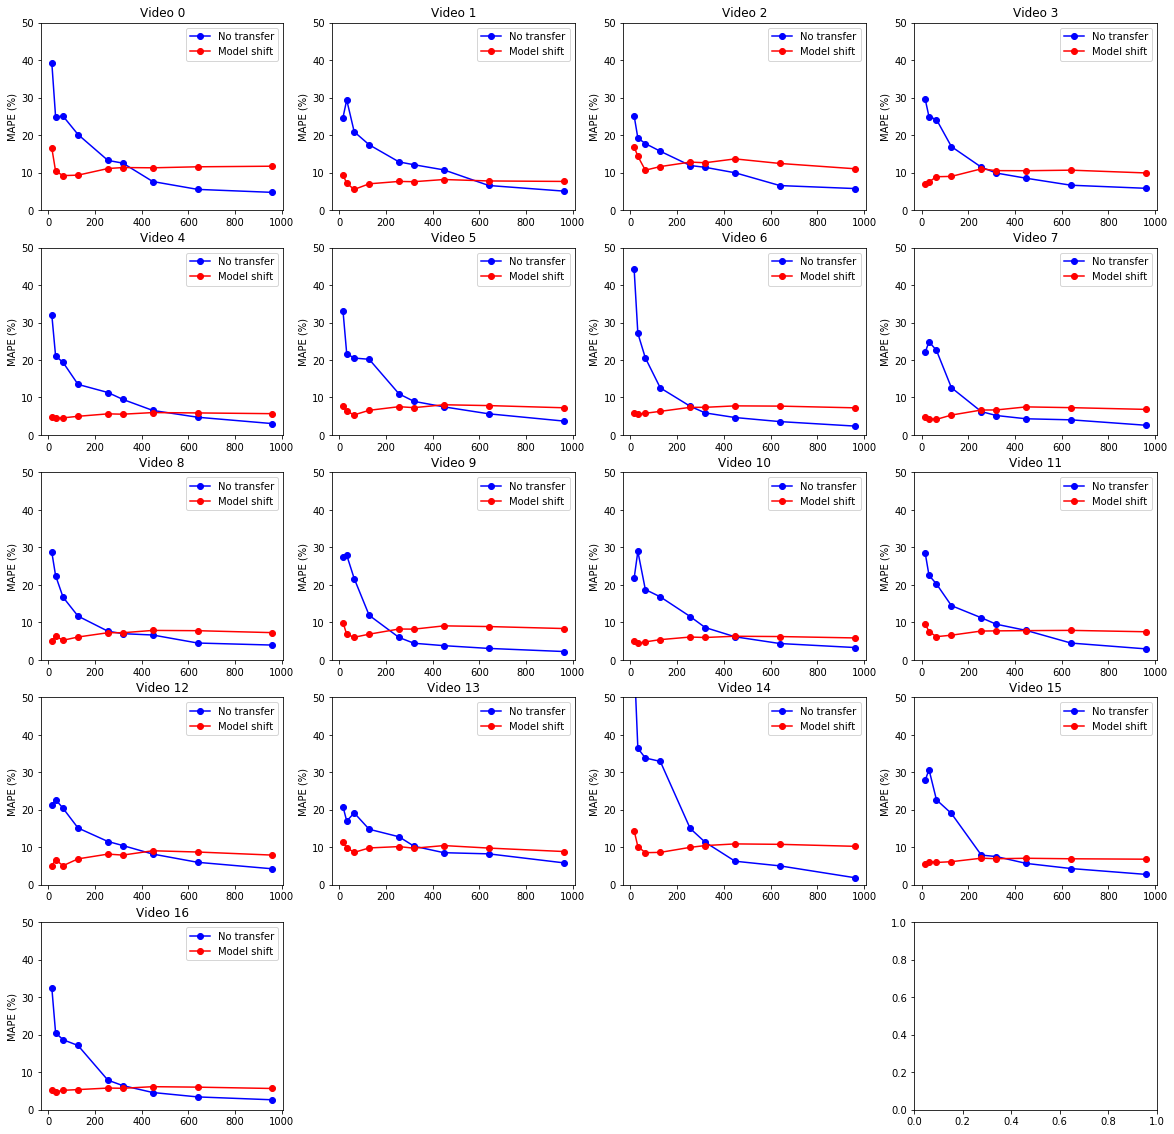

In [39]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(5,4,20)
for i in range(nbVideos):
    plt.subplot(5,4,i+1)
    plt.ylim((0,50))
    plt.ylabel('MAPE (%)')
    plt.plot(nbConfig, 100*res_no_transfer.iloc[i], 'o-', c='blue', label = 'No transfer')
    plt.plot(nbConfig, 100*res_model_shift.iloc[i], 'o-', c='red', label = 'Model shift')
    plt.legend()
    plt.title('Video '+str(i))
plt.show()